In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.core import indices
from scipy.linalg import eig
import pandas as pd

# Problema 1

Parte 1

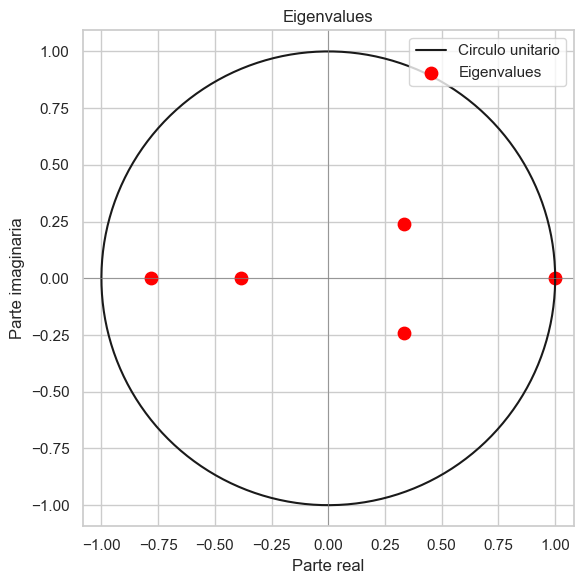

      Eigenvalues
0  1.0000+0.0000j
1  0.3340+0.2395j
2  0.3340-0.2395j
3 -0.3847+0.0000j
4 -0.7833+0.0000j 

                                v1              v2              v3  \
Right eigenvectors                                                   
x1                  0.4472+0.0000j -0.6731+0.0000j -0.6731-0.0000j   
x2                  0.4472+0.0000j -0.0807-0.2351j -0.0807+0.2351j   
x3                  0.4472+0.0000j  0.2554-0.2015j  0.2554+0.2015j   
x4                  0.4472+0.0000j  0.3479+0.2228j  0.3479-0.2228j   
x5                  0.4472+0.0000j -0.1482+0.4321j -0.1482-0.4321j   

                                v4              v5  
Right eigenvectors                                  
x1                  0.4473+0.0000j  0.2978+0.0000j  
x2                 -0.5528+0.0000j -0.6409+0.0000j  
x3                  0.2545+0.0000j  0.6197+0.0000j  
x4                  0.3570+0.0000j -0.3299+0.0000j  
x5                 -0.5497+0.0000j  0.0871+0.0000j   

                          

In [55]:
K = np.array([
    [0.3, 0.6, 0.1, 0.0, 0.0],
    [0.2, 0.0, 0.7, 0.0, 0.1],
    [0.0, 0.5, 0.0, 0.5, 0.0],
    [0.0, 0.0, 0.4, 0.1, 0.5],
    [0.4, 0.1, 0.0, 0.4, 0.1]
])

# ========= Circulo unitario y eigenvalues =========

eigenvalues, left_vecs, right_vecs = eig(K, left=True, right=True)

theta = np.linspace(0, 2 * np.pi, 500)
circle = np.exp(1j * theta)
plt.figure(figsize=(6, 6))
plt.plot(circle.real, circle.imag, 'k-', label='Circulo unitario')
plt.scatter(eigenvalues.real, eigenvalues.imag, color='red', s=80, label='Eigenvalues')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.xlabel('Parte real')
plt.ylabel('Parte imaginaria')
plt.title('Eigenvalues')
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#  ========== Eigenvalues y eigenvectors ==========

df_eigenvalues = pd.DataFrame({
    'Eigenvalues': eigenvalues
})

df_right = pd.DataFrame(
    right_vecs,
    columns=[f"v{i+1}" for i in range(right_vecs.shape[1])]
)
df_right.index = [f"x{i+1}" for i in range(right_vecs.shape[0])]
df_right.index.name = "Right eigenvectors"

df_left = pd.DataFrame(
    left_vecs,
    columns=[f"w{i+1}" for i in range(left_vecs.shape[1])]
)
df_left.index = [f"x{i+1}" for i in range(left_vecs.shape[0])]
df_left.index.name = "Left eigenvectors"

print(df_eigenvalues.round(4), '\n')
print(df_right.round(4), '\n')
print(df_left.round(4))

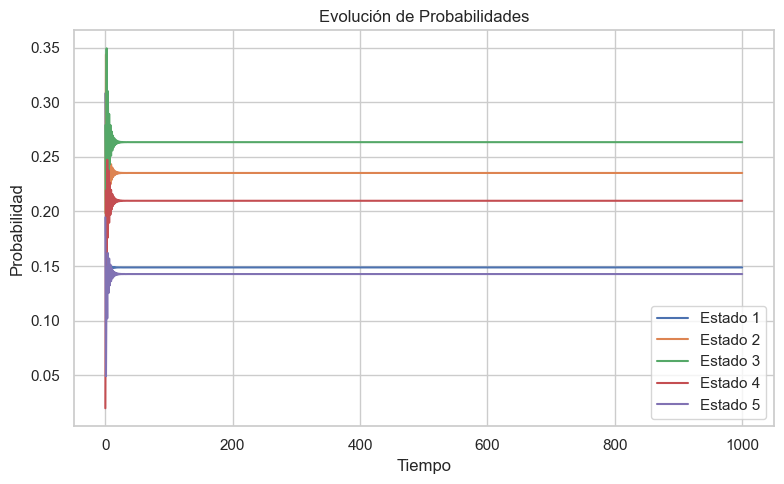


Resumen de la evolución de probabilidades:
        Estado 1  Estado 2  Estado 3  Estado 4  Estado 5
Tiempo                                                  
0       0.308135  0.198504  0.278989  0.019795  0.194577
1       0.209972  0.343834  0.177684  0.219305  0.049206
2       0.151441  0.219746  0.349403  0.130455  0.148956
3       0.148964  0.280461  0.221148  0.247329  0.102098
4       0.141620  0.210162  0.310151  0.176146  0.161921
1000    0.148759  0.235266  0.263481  0.209799  0.142695


In [77]:
def simular_markov(K, v0=None, tol=1e-80, max_iter=1000, verbose=True):
    n = K.shape[0]

    if v0 is None:
        v = np.random.dirichlet(np.ones(n))
    else:
        v = np.array(v0)
        assert np.all(v >= 0) and np.isclose(np.sum(v), 1), "El vector inicial debe tener valores entre 0 y 1 y sumar 1"

    historial = [v]

    for _ in range(max_iter):
        v_next = historial[-1] @ K
        if np.sum(np.abs(v_next - historial[-1])) < tol:
            historial.append(v_next)
            break
        historial.append(v_next)

    df = pd.DataFrame(historial, columns=[f"Estado {i+1}" for i in range(n)])
    df.index.name = "Tiempo"

    # Graficar
    plt.figure(figsize=(8, 5))
    for col in df.columns:
        plt.plot(df.index, df[col], label=col)
    plt.xlabel("Tiempo")
    plt.ylabel("Probabilidad")
    plt.title("Evolución de Probabilidades")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Imprimir resumen
    if verbose:
        print("\nResumen de la evolución de probabilidades:")
        resumen = pd.concat([df.head(5), df.tail(1)])
        print(resumen)

    return df

df_resultado = simular_markov(K)
prob_pi = df_resultado.iloc[-1].values

In [64]:
modulos = np.abs(eigenvalues)
indices = np.argsort(-modulos)
slem_idx = indices[1]
slem_val = eigenvalues[slem_idx]
slem_mod = modulos[slem_idx]

print(f"Segundo valor con mayor módulo: {slem_val:.6f}")
print(f"Su módulo: {slem_mod:.6f}")

Segundo valor con mayor módulo: -0.783331+0.000000j
Su módulo: 0.783331


Parte 2

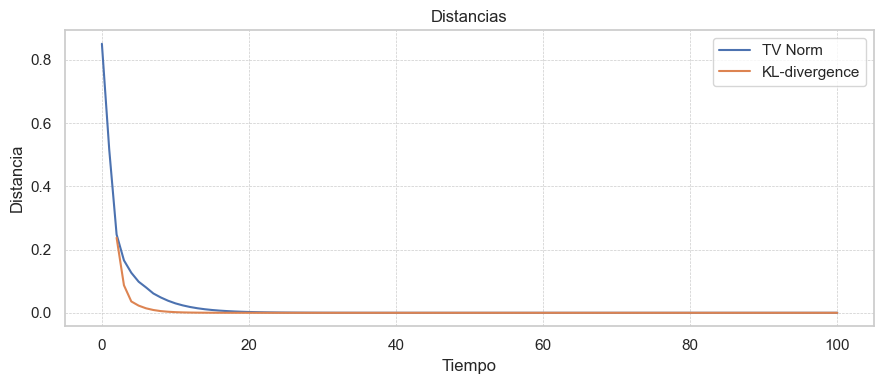

In [107]:
def distancia_TV(prob_pi, prob_mu):
    return np.sum(np.abs(prob_pi - prob_mu)) / 2

def distancia_KL(prob_pi, prob_mu):
    with np.errstate(divide='ignore', invalid='ignore'):
        ratio = np.where(prob_pi > 0, prob_pi / prob_mu, 1)
        return np.sum(np.where(prob_pi > 0, prob_pi * np.log(ratio), 0))

def simular_markov_convergencia(K, v0=None, max_iter=1000):
    n = K.shape[0]

    if v0 is None:
        v = np.random.dirichlet(np.ones(n))
    else:
        v = np.array(v0, dtype=np.float64)
        assert np.all(v >= 0) and np.isclose(np.sum(v), 1), "El vector inicial debe tener valores entre 0 y 1 y sumar 1"

    historial = [v]

    for _ in range(max_iter):
        v_next = historial[-1] @ K
        historial.append(v_next)

    df = pd.DataFrame(historial, columns=[f"Estado {i+1}" for i in range(n)])
    df.index.name = "Tiempo"

    prob_pi = df.iloc[-1].values

    dist_tv = [distancia_TV(prob_pi, row) for row in df.values]
    dist_kl = [distancia_KL(prob_pi, row) for row in df.values]

    # Gráfica
    plt.figure(figsize=(9, 4))
    plt.plot(dist_tv, label='TV Norm')
    plt.plot(dist_kl, label='KL-divergence')
    plt.xlabel("Tiempo")
    plt.ylabel("Distancia")
    plt.title("Distancias")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    return df, prob_pi

epsilon = 0.0001
v0 = [1 - 4 * epsilon, epsilon, epsilon, epsilon, epsilon]
v00 = [1,0,0,0,0]
df, prob_pi = simular_markov_convergencia(K, v0=v00, max_iter=100)


Parte 3

In [1]:
print("Hello World!")

Hello World!
